In [37]:
import pandas as pd
import numpy as np

data = pd.read_csv("/mnt/a99/d0/sandy/Forecasting/data/energy-anomaly-detection/energy_injected_5.csv")
data.head()

,timestamp,meter_reading,anomaly
0,2016-01-01 00:00:00,488.0,0
1,2016-01-01 01:00:00,488.0,0
2,2016-01-01 02:00:00,491.0,0
3,2016-01-01 03:00:00,490.0,0
4,2016-01-01 04:00:00,491.0,0


In [38]:
def series_segmentation(data, stepsize=1):
    return np.split(data, np.where(np.diff(data) != stepsize)[0] + 1)
outlier_idxs = np.where(data.anomaly == 1)[0]
# outliers = list(data.iloc[outlier_idxs])
outcome = series_segmentation(outlier_idxs)

In [86]:
np.random.seed(34)
mask = np.zeros_like(data['anomaly'])
for line in outcome:
    if abs(line[0]-line[-1])>20:
        s = line[0]+np.random.randint(5)
        e = line[-1]-np.random.randint(5)
        mask[s:e+1]=1

    elif not(3<abs(line[-1]-line[0])<10 ):
        mask[line[0]:line[-1]+1]=1
    else:
        print("df",line[-1]-line[0])
print(sum(data['anomaly']),sum(mask))
        

df 9
df 8
df 4
411 352


In [88]:
data['anomaly'] = mask 
data.to_csv("/mnt/cat/data/sandy/Forecasting/data/energy-anomaly-detection/energy_injected_reduced.csv")

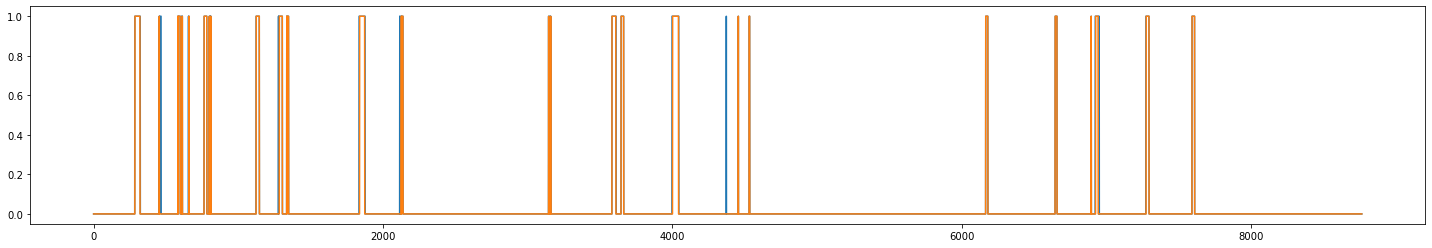

In [80]:
from matplotlib import pyplot as plt 
plt.rcParams['figure.figsize']=(25,4)
plt.plot(data['anomaly'])
plt.plot(mask)
plt.show()